# Pivot Tables
Takes column wise table as input and group the entries in 2D table to summarize the data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [2]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
#groupby gender
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


#### Using the vocabulary of GroupBy, we might proceed using something like this: we group by class and gender, select survival, apply a mean aggregate, combine the resulting groups, and then unstack the hierarchical index to reveal the hidden multidimensionality

In [4]:
titanic.groupby(['sex','class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [5]:
# we ccan use the similar thing using 'Pivot Table'
titanic.pivot_table('survived',index='sex',columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### Multilevel pivot tables

In [6]:
# we might be interested in looking at
# age as a third dimension.

age = pd.cut(titanic['age'],[0,18,30,80])
age.head()

0    (18, 30]
1    (30, 80]
2    (18, 30]
3    (30, 80]
4    (30, 80]
Name: age, dtype: category
Categories (3, interval[int64]): [(0, 18] < (18, 30] < (30, 80]]

In [7]:
titanic.pivot_table('survived',['sex',age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 30]  0.958333  0.900000  0.500000
       (30, 80]  0.980000  0.900000  0.304348
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 30]  0.428571  0.027027  0.147541
       (30, 80]  0.360000  0.106383  0.112500

In [8]:
# let’s add info on the fare paid using pd.qcut to automatically compute quantiles:

fare = pd.qcut(titanic['fare'],2)
fare.head()

0     (-0.001, 14.454]
1    (14.454, 512.329]
2     (-0.001, 14.454]
3    (14.454, 512.329]
4     (-0.001, 14.454]
Name: fare, dtype: category
Categories (2, interval[float64]): [(-0.001, 14.454] < (14.454, 512.329]]

In [9]:
titanic.pivot_table('survived',['sex',age],[fare,'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 30]              NaN  0.916667  0.500000          0.958333   
       (30, 80]              NaN  0.846154  0.250000          0.980000   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 30]              NaN  0.040000  0.138889          0.428571   
       (30, 80]              0.0  0.153846  0.102941          0.380282   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 30]  0.888889  0.500000  
       (30, 80]  0.941176  0.333333  
male   (0, 18]   0.818182  0.178571  
       (18, 30]  0.000000  0.214286  
       (30, 80]  0.047619  0.166667

### call signature as of Pandas 0.18
##### DataFrame.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')

In [10]:
titanic.pivot_table(index='sex',columns='class',
                   aggfunc = {'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

# Example : Birthrate Data

Data on births in the United States

In [11]:
# !curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

In [12]:
births = pd.read_csv('C:\\Users\\acer\\ml\\datasets\\births.csv')

In [13]:
births.head()


,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [14]:
births.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


In [15]:
#add decade class to look at male and female births as a function of decade:
births['decade'] = 10*(births['year']//10)
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [16]:
births.pivot_table('births', index='decade',columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0, 0.5, 'total births per year')

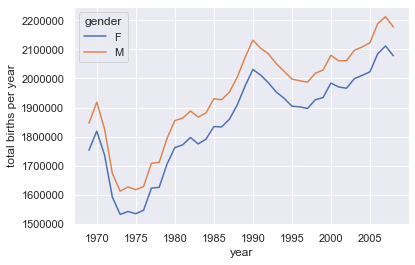

In [17]:
# see this visually
# we will learn matplotlib soon
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  #use seaborn
births.pivot_table('births',index='year',columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year')

In [19]:
#Cleaning of data
#cut outliers via robust sigma-clipping operation:
quartiles = np.percentile(births['births'], [25,50,75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [20]:
quartiles

array([4358. , 4814. , 5289.5])

In [21]:
mu 


4814.0

In [22]:
sig

689.31

In [23]:
#now we can use the query method to filter out the rows with births outside these values:
births = births.query('(births > @mu -5 * @sig) & (births < @mu + 5 * @sig)')

In [25]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [26]:
#set day column to integer; it orginally was a string due to nulls
births['day'] = births['day'].astype(int)


In [28]:
#combine date, month and year to for Date index:
births.index = pd.to_datetime(10000* births.year +
                             100 * births.month +
                             births.day, format = '%Y%m%d')
births['dayofweek'] = births.index.dayofweek

In [29]:
births.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


In [30]:
#visualise graphically
import matplotlib.pyplot as plt
import matplotlib as mpl

Text(0, 0.5, 'mean births by day')

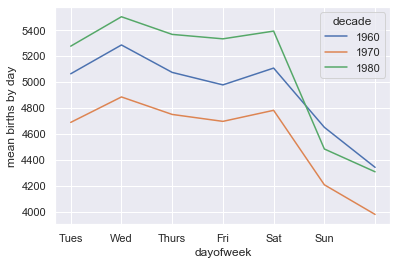

In [31]:
births.pivot_table('births', index = 'dayofweek',
                  columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon','Tues','Wed','Thurs','Fri','Sat','Sun'])
plt.ylabel('mean births by day')

#### plot mean number of birth by the day of the year

In [33]:
birthsByDate = births.pivot_table('births',[births.index.month, births.index.day])
birthsByDate

births
1  1   4009.225
   2   4247.400
   3   4500.900
   4   4571.350
   5   4603.625
...         ...
12 27  4850.150
   28  5044.200
   29  5120.150
   30  5172.350
   31  4859.200

[366 rows x 1 columns]

In [34]:
#lets make it more readable
birthsByDate.index = [pd.datetime(2012, month, day)
                     for (month, day) in birthsByDate.index]
birthsByDate.head()

C:\Users\acer\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


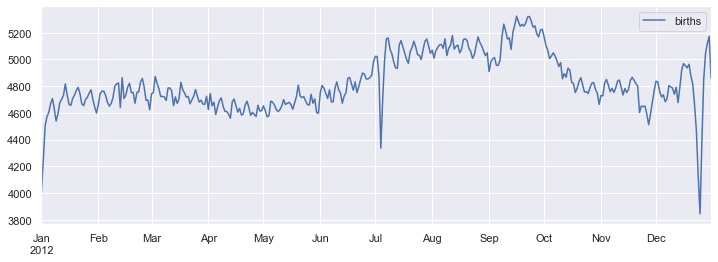

In [35]:
#plot the data using month wise
fig, ax = plt.subplots(figsize=(12,4))
birthsByDate.plot(ax=ax)